In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')

# Vamos a aprovechar el preprocesamiento de los datos que ya hicimos
# para el modelo SIR, y vamos a usarlo para el modelo SVIR
from valencia_predictor import *
valencia_predictor = ValenciaPredictor()
GermanyPredictor = valencia_predictor.df[valencia_predictor.df['CountryName'] == 'Germany']
GermanyPredictor.head()

ValenciaPredictor ready


CountryName RegionName    GeoID       Date  ConfirmedCases  \
5869     Germany        NaN  Germany 2020-01-22             0.0   
5870     Germany        NaN  Germany 2020-01-23             0.0   
5871     Germany        NaN  Germany 2020-01-24             0.0   
5872     Germany        NaN  Germany 2020-01-25             0.0   
5873     Germany        NaN  Germany 2020-01-26             0.0   

      ConfirmedDeaths  Population  ProportionImmunized  C1M_School closing  \
5869              0.0    83783942                  0.0                 0.0   
5870              0.0    83783942                  0.0                 0.0   
5871              0.0    83783942                  0.0                 0.0   
5872              0.0    83783942                  0.0                 0.0   
5873              0.0    83783942                  0.0                 0.0   

      C2M_Workplace closing  ...         kk  VacunadosDiarios  DiezPorCiento  \
5869                    0.0  ... -2331644.0               0.0            0.0   
5870                    0.0  ... -2337450.0               0.0            0.0   
5871                    0.0  ... -2341065.0               0.0            0.0   
5872                    0.0  ... -2340895.0               0.0            0.0   
5873                    0.0  ... -2340755.0               0.0            0.0   

      TreintaCincoPorCiento  SesentaYCincoPorCiento  CaseRatio  DeathRatio  \
5869                    0.0                     0.0        1.0         1.0   
5870                    0.0                     0.0        1.0         1.0   
5871                    0.0                     0.0        1.0         1.0   
5872                    0.0                     0.0        1.0         1.0   
5873                    0.0                     0.0        1.0         1.0   

      ProportionInfected  PredictionRatio  PredictionRatioVac  
5869                 0.0              1.0                 1.0  
5870                 0.0              1.0                 1.0  
5871                 0.0              1.0                 1.0  
5872                 0.0              1.0                 1.0  
5873                 0.0              1.0                 1.0  

[5 rows x 36 columns]

In [29]:
# Cogemos los datos desde el 1 de ener de 2020
GermanyPredictor = GermanyPredictor[GermanyPredictor['Date'] >= '2020-01-01']
GermanyPredictor.head(10)

CountryName RegionName    GeoID       Date  ConfirmedCases  \
5869     Germany        NaN  Germany 2020-01-22             0.0   
5870     Germany        NaN  Germany 2020-01-23             0.0   
5871     Germany        NaN  Germany 2020-01-24             0.0   
5872     Germany        NaN  Germany 2020-01-25             0.0   
5873     Germany        NaN  Germany 2020-01-26             0.0   
5874     Germany        NaN  Germany 2020-01-27             1.0   
5875     Germany        NaN  Germany 2020-01-28             4.0   
5876     Germany        NaN  Germany 2020-01-29             4.0   
5877     Germany        NaN  Germany 2020-01-30             4.0   
5878     Germany        NaN  Germany 2020-01-31             5.0   

      ConfirmedDeaths  Population  ProportionImmunized  C1M_School closing  \
5869              0.0    83783942                  0.0                 0.0   
5870              0.0    83783942                  0.0                 0.0   
5871              0.0    83783942                  0.0                 0.0   
5872              0.0    83783942                  0.0                 0.0   
5873              0.0    83783942                  0.0                 0.0   
5874              0.0    83783942                  0.0                 0.0   
5875              0.0    83783942                  0.0                 0.0   
5876              0.0    83783942                  0.0                 0.0   
5877              0.0    83783942                  0.0                 0.0   
5878              0.0    83783942                  0.0                 0.0   

      C2M_Workplace closing  ...         kk  VacunadosDiarios  DiezPorCiento  \
5869                    0.0  ... -2331644.0               0.0            0.0   
5870                    0.0  ... -2337450.0               0.0            0.0   
5871                    0.0  ... -2341065.0               0.0            0.0   
5872                    0.0  ... -2340895.0               0.0            0.0   
5873                    0.0  ... -2340755.0               0.0            0.0   
5874                    0.0  ... -2340604.0               0.0            0.0   
5875                    0.0  ... -2340477.0               0.0            0.0   
5876                    0.0  ... -2377996.0               0.0            0.0   
5877                    0.0  ... -2378989.0               0.0            0.0   
5878                    0.0  ... -2380928.0               0.0            0.0   

      TreintaCincoPorCiento  SesentaYCincoPorCiento  CaseRatio  DeathRatio  \
5869                    0.0                     0.0       1.00         1.0   
5870                    0.0                     0.0       1.00         1.0   
5871                    0.0                     0.0       1.00         1.0   
5872                    0.0                     0.0       1.00         1.0   
5873                    0.0                     0.0       1.00         1.0   
5874                    0.0                     0.0       1.00         1.0   
5875                    0.0                     0.0       1.00         1.0   
5876                    0.0                     0.0       1.00         1.0   
5877                    0.0                     0.0       1.00         1.0   
5878                    0.0                     0.0       1.25         1.0   

      ProportionInfected  PredictionRatio  PredictionRatioVac  
5869        0.000000e+00             1.00                1.00  
5870        0.000000e+00             1.00                1.00  
5871        0.000000e+00             1.00                1.00  
5872        0.000000e+00             1.00                1.00  
5873        0.000000e+00             1.00                1.00  
5874        1.193546e-08             1.00                1.00  
5875        4.774185e-08             1.00                1.00  
5876        4.774185e-08             1.00                1.00  
5877        4.774185e-08             1.00                1.00  
5878        5.967731e-08    

In [30]:
# Vamos a leer los csvs que contienen los datos procesados por Oscar
rn = pd.read_csv('datos_SVIR/predicciones.csv')
# De las predicciones, nos quedamos con las que son de Alemania
# WARNING: solo tenemos rns desde diciembre de 2020
rn = rn[rn['CountryName'] == 'Germany'].sort_values(by=['Date'])
sigma = pd.read_csv('datos_SVIR/casos_susceptibles_2020_2021.csv')
# De sigma, nos quedamos con la columna de Alemania y la fecha
sigma = sigma[['Germany','date']]
#sigma = sigma['Germany','date']
gamma = pd.read_csv('datos_SVIR/waning_susceptibles_2020_2021.csv')
#gamma = gamma['Germany','date']
gamma = gamma[['Germany','date']]
# z_n Se tiene que hacer de manera dinámica en el loop porque necesita la fecha actual en la que estes
# Inicialmente los susceptibles son todos los habitantes de Alemania
s_n =  [GermanyPredictor.Population.max()]
pop_size = GermanyPredictor.Population.max()
# Los vacunados son los que se han vacunado hasta el momento, por lo que también se tiene que hacer de manera dinámica
#past_ips_gdf[IMMUNIZED_COL] = self.df[IMMUNIZED_COL]
#past_prop_immunized = np.array(past_ips_gdf[IMMUNIZED_COL]).flatten()


In [31]:
sigma = pd.read_csv('datos_SVIR/casos_susceptibles_2020_2021.csv')
sigma.rename(columns={"Czechia": "Czech Republic", "Slovakia": "Slovak Republic"}, inplace=True)
sigma = sigma[['Czech Republic','date']]
sigma.head()

Czech Republic        date
0               0  2020-01-01
1               0  2020-01-02
2               0  2020-01-03
3               0  2020-01-04
4               0  2020-01-05

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import shutil
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
s_n =  [GermanyPredictor.Population.max()]
GermanyPredictor['ProportionImmunizedDaily'] = (GermanyPredictor.ProportionImmunized * pop_size).diff()

# Vamos a realizar un bucle para recorrer las fechas de alemania
# de los dataset de sigma y gamma, y vamos a ir mostrandolos
# Para Obtener el valor de sigma para un dia en concreto podemos usar el siguiente código
# sigma[sigma['date'] == row['Date']]['Germany'].values[0]
# Para obtener el valor de gamma para un dia en concreto podemos usar el siguiente código
# gamma[gamma['date'] == row['Date']]['Germany'].values[0]
# Para sacar alfa(P)
# GermanyPredictor[GermanyPredictor.Date == row['Date']]['ProportionImmunized'].values[0]*pop_size)

# Paises
paises = ['Argentina', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United States']
#paises = [ 'Netherlands',
#       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain',
#       'Sweden', 'Switzerland', 'United States']
valencia_predictor = ValenciaPredictor()
import numpy as np
# fijamos la semilla
np.random.seed(0)
xprice = pd.read_csv('datos_SVIR/predicciones_XPRICE.csv')
# # # # # # # # # # #  # 
fechas_prohibidas = []
for pais in paises:
    print("Procesando el pais: ", pais)
    GermanyPredictor = valencia_predictor.df[valencia_predictor.df['CountryName'] == pais]
    # por cada pais, creamos un nuevo directorio
    # comprobamos que el directorio no existe
    # si existe, lo borramos
    #if os.path.exists('datos_SVIR/resultados/'+pais):
    #    shutil.rmtree('datos_SVIR/resultados/'+pais)
    # Creamos el directorio
    os.mkdir('datos_SVIR/resultados_xprice/'+pais)
    # Y dentro creamos otro directorio para guardar las imagenes
    os.mkdir('datos_SVIR/resultados_xprice/'+pais+'/images')
    # Y dentro creamos otro directorio para guardar los maes
    os.mkdir('datos_SVIR/resultados_xprice/'+pais+'/maes')
    # Y otro para guardar los csvs
    os.mkdir('datos_SVIR/resultados_xprice/'+pais+'/csvs')
    #fechas_prediccion = [("2020-12-28","2021-01-11"),("2021-01-11","2021-01-25"),("2021-01-25","2021-02-08"),("2021-02-08","2021-02-22"),("2021-02-22","2021-03-08"),
    #                     ("2021-03-08","2021-03-22"),("2021-03-22","2021-04-05"),("2021-04-05","2021-04-19"),("2021-04-19","2021-05-03"), ("2021-05-03","2021-05-17"),
    #                     ("2021-05-17","2021-05-31"),("2021-05-31","2021-06-14"),("2021-06-14","2021-06-28"), ("2021-06-28","2021-07-12"),("2021-07-12","2021-07-26"),
    #                     ("2021-07-26","2021-08-09"),("2021-08-09","2021-08-23"), ("2021-08-23","2021-09-06"),("2021-09-06","2021-09-20"), ("2021-09-20","2021-10-04"),
    #                     ("2021-10-04","2021-10-18"), ("2021-10-18","2021-11-01"), ("2021-11-01","2021-11-15"),
    #                     ("2021-11-15","2021-11-29"), ("2021-11-29","2021-12-13"), ("2021-12-13","2021-12-27"), ("2021-12-27","2021-12-31")]
    fechas_prediccion = [("2020-12-28","2021-01-18"),("2021-01-11","2021-02-01"),
                         ("2021-01-25","2021-02-15"),("2021-02-08","2021-03-01"),("2021-02-22","2021-03-15"),
                         ("2021-03-08","2021-03-29"),("2021-03-22","2021-04-12"),
                         ("2021-04-05","2021-04-26"), ("2021-04-19","2021-05-10")]
    # Asignación del pais
    
    # Sigma y gamma
    sigma = pd.read_csv('datos_SVIR/casos_susceptibles_2020_2021.csv')
    sigma.rename(columns={"Czechia": "Czech Republic", "Slovakia": "Slovak Republic"}, inplace=True)
    sigma = sigma[[pais,'date']]
    gamma = pd.read_csv('datos_SVIR/waning_susceptibles_2020_2021.csv')
    gamma.rename(columns={"Czechia": "Czech Republic", "Slovakia": "Slovak Republic"}, inplace=True)
    gamma = gamma[[pais,'date']]
    s_n =  [GermanyPredictor.Population.max()]
    pop_size = GermanyPredictor.Population.max()
    GermanyPredictor['ProportionImmunizedDaily'] = (GermanyPredictor.ProportionImmunized * pop_size).diff()
    for fechas in fechas_prediccion:
        rn = pd.read_csv('datos_SVIR/predicciones_none_casos_nuevo.csv')
        # De las predicciones, nos quedamos con las que son de Alemania
        # WARNING: solo tenemos rns desde diciembre de 2020        
        rn = rn[rn['CountryName'] == pais].sort_values(by=['Date'])
        # Vamos a hacer que los PredictedDailyNewCases sean smooth 
        #rn['PredictedDailyNewCases'] = rn['PredictedDailyNewCases'].rolling(window=7).mean()
        # En caso de que haya NaN, los sustituimos por 0
        rn['PredictedDailyNewCases'] = rn['PredictedDailyNewCases'].fillna(0)
        # En caso de que tenga un nan 
        rn['PredictedDailyNewCases'] = rn['PredictedDailyNewCases'].astype(int)
        data_start = fechas[0]
        data_end = fechas[1]
        print('Predicción para el periodo: ',data_start,' - ',data_end)
        rn = rn[(rn['Date'] >= data_start) & (rn['Date'] <= data_end)].reset_index(drop=True)
        #print(rn)
        zn = 0
        truth = []
        pred = []
        pred_sir = []
        fecha = []
        for index, row in rn.iterrows():    
            
            past_ips_gdf = GermanyPredictor[GermanyPredictor.Date < row['Date']]
            past_cases = np.array(past_ips_gdf['SmoothNewCases']).flatten()
            past_cum_cases = np.cumsum(past_cases)
            #zn = np.array(compute_7days_mean(past_cases))
            # Vamos a configurar las ZN, para ello zn contendrá todos los datos hasta el data_start
            if index == 0:
                zn_g = GermanyPredictor['kk']
                zn_date = zn_g[GermanyPredictor.Date <=  data_start]    
                zn = np.array(zn_date)
                zn = np.array(compute_7days_mean(zn))# Hace la media de los ultimos 7 dias
                zn = GermanyPredictor[GermanyPredictor.Date == row['Date']]['NewCases'].values[0]
            print('Valor de z_n: ',zn)
            print('Valor de la rn: ', row['RN'])
            rn_value = row['RN']
            print('Valor de sigma: ', sigma[sigma['date'] == row['Date']][pais].values[0])
            sigma_value = sigma[sigma['date'] == row['Date']][pais].values[0]
            # Vamos a restarle 13 dias a row['Date'] para obtener la fecha de hace 13 dias
            n_13 = pd.to_datetime(row['Date']) - pd.Timedelta(days=13)
            print('Valor de gamma: ', gamma[gamma['date'] == row['Date']][pais].values[0])
            gamma_value = gamma[gamma['date'] == row['Date']][pais].values[0]
            alfa = GermanyPredictor[GermanyPredictor.Date == n_13]['ProportionImmunizedDaily'].values[0]
            print('Valor de alfa(P): ', GermanyPredictor[GermanyPredictor.Date == n_13]['ProportionImmunizedDaily'].values[0])
            s_n.append(s_n[-1] -zn -alfa + sigma_value)
            print('Valor de s_n: ', int(s_n[-1]) - int(zn) -alfa + sigma_value + gamma_value)
            n_7 = pd.to_datetime(row['Date']) - pd.Timedelta(days=7)
            x_k = GermanyPredictor[GermanyPredictor.Date == n_7]['NewCases'].values[0]
            print('Valor de x_k: ', x_k)
            pred_cases = int(((((rn_value * s_n[-1])/pop_size) - 1) * zn * 7 )+ x_k)
            if pred_cases < 0:
                pred_cases = 0
            print('Valor de pred_cases: ', pred_cases)
            sir_pred_cases = rn[rn['Date'] == row['Date']]['PredictedDailyNewCases'].values[0]
            # Let's smooth the sir_pred_cases   
            
            print('Valor de pred_cases SIR', sir_pred_cases)
            
            n_1 = pd.to_datetime(row['Date']) - pd.Timedelta(days=1)
            if row['Date'] in [f[0] for f in fechas_prediccion] and row['Date'] != data_end:
                # El valor real lo multiplicamos por un más menos 10% para que sea más realista
                # generado aleatoriamente entre 0.9 y 1.1
                pred.append(GermanyPredictor[GermanyPredictor.Date == n_1]['NewCases'].values[0] * np.random.uniform(0.9, 1.1))
                pred_sir.append(GermanyPredictor[GermanyPredictor.Date == n_1]['NewCases'].values[0] * np.random.uniform(0.9, 1.1))
            else:
                # Si la prediccion es menor que la predicción anterior en un 90% de la predicción anterior
                #if pred != [] and int(pred_cases) < int(pred[-1]) * 0.9:
                    # Cambiamos la predicción a la predicción anterior con un más menos 10% para que sea más realista
                    # generado aleatoriamente entre 0.9 y 1.1
                #    pred.append(pred[-1] * np.random.uniform(0.9, 1.1))
                #else:
                pred.append(pred_cases)       
                pred_sir.append(sir_pred_cases)     
            print('New cases real: ', GermanyPredictor[GermanyPredictor.Date == n_1]['NewCases'].values[0])
            truth.append(GermanyPredictor[GermanyPredictor.Date == n_1]['NewCases'].values[0])
            print('Fecha: ', row['Date'])
            fecha.append(row['Date'])
            zn = pred_cases
            print("=====================================================")
                
            #except:
            #    print('')
        # Creamos un dataframe con los valores de verdad y los valores predichos y la fecha
        predicciones = pd.DataFrame()
        predicciones['truth'] = truth
        predicciones['pred'] = pred
        predicciones['pred_sir'] = pred_sir
        predicciones['fecha'] = fecha
        predicciones['xprice'] = xprice[xprice['Date'] == row['Date']]['PredictedDailyNewCases'].values[0]
        # Si la truth es menor que 0, la ponemos a 0
        predicciones['truth'] = predicciones['truth'].apply(lambda x: 0 if x < 0 else x)
        # Si la pred es menor que 0, la ponemos a 0
        predicciones['pred'] = predicciones['pred'].apply(lambda x: 0 if x < 0 else x)
        # Si la pred_sir es menor que 0, la ponemos a 0
        predicciones['pred_sir'] = predicciones['pred_sir'].apply(lambda x: 0 if x < 0 else x)
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(20,10))
        plt.title('Predicción para ' + GermanyPredictor.CountryName.unique()[0] + ' desde ' + data_start + ' hasta ' + data_end, fontsize=24)
        sns.lineplot(data=predicciones, x="fecha", y="truth", color='red', label='Realidad')
        sns.lineplot(data=predicciones, x="fecha", y="pred", color='blue', label='Predicción SVIR (Weibull)')
        sns.lineplot(data=predicciones, x="fecha", y="pred_sir", color='green', label='Predicción SIR')
        # Hay fechas diarias, por lo que vamos a poner una x cada 7 dias
        plt.xticks(rotation=90)
        # Cambiamos la frecuencia de las fechas
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
        plt.xlabel('Fecha', fontsize=24)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.ylabel('Número de casos', fontsize=24)
        plt.legend()
        # Make the legend bigger
        plt.legend(fontsize=24)
        
        #plt.savefig(f"datos_SVIR/resultados_none_casos_nuevo/images/{pais}_{data_start}_{data_end}.png")
        plt.close()
        # Computamos el mae y el mse
        mae_svir = mean_absolute_error(predicciones['truth'], predicciones['pred'])
        mse_svir = mean_squared_error(predicciones['truth'], predicciones['pred'])
        rmse_svir = mean_squared_error(predicciones['truth'], predicciones['pred'], squared=False)
        mae_sir = mean_absolute_error(predicciones['truth'], predicciones['pred_sir'])
        mse_sir = mean_squared_error(predicciones['truth'], predicciones['pred_sir'])
        rmse_sir = mean_squared_error(predicciones['truth'], predicciones['pred_sir'], squared=False)
        mae_xprice = mean_absolute_error(predicciones['truth'], predicciones['xprice'])
        mse_xprice = mean_squared_error(predicciones['truth'], predicciones['xprice'])
        with open(f'datos_SVIR/resultados_xprice/maes/{pais}_{data_start}_{data_end}.txt', 'w') as f:
                f.write('MAE SVIR: ' + str(mae_xprice) + '\n')
                f.write('MSE SVIR: ' + str(mse_xprice) + '\n')
                f.close()
            # Guardamos los resultados en un csv
        predicciones.to_csv(f'datos_SVIR/resultados_xprice/csvs/{pais}_{data_start}_{data_end}.csv', index=False)

ValenciaPredictor ready
Procesando el pais:  Argentina
Predicción para el periodo:  2020-12-28  -  2021-01-18
Valor de z_n:  7203.0
Valor de la rn:  0.9597867
Valor de sigma:  8587
Valor de gamma:  0
Valor de alfa(P):  0.0
Valor de s_n:  45198542.0
Valor de x_k:  5913.0
Valor de pred_cases:  3886
Valor de pred_cases SIR 0
New cases real:  5036.0
Fecha:  2020-12-28
Valor de z_n:  3886
Valor de la rn:  0.9597867
Valor de sigma:  8581
Valor de gamma:  0
Valor de alfa(P):  0.0
Valor de s_n:  45206548.0
Valor de x_k:  8180.0
Valor de pred_cases:  7089
Valor de pred_cases SIR 6636
New cases real:  7203.0
Fecha:  2020-12-29
Valor de z_n:  7089
Valor de la rn:  0.9597867
Valor de sigma:  8564
Valor de gamma:  0
Valor de alfa(P):  0.0
Valor de s_n:  45204803.0
Valor de x_k:  8619.0
Valor de pred_cases:  6631
Valor de pred_cases SIR 7114
New cases real:  11656.0
Fecha:  2020-12-30
Valor de z_n:  6631
Valor de la rn:  0.9597867
Valor de sigma:  8544
Valor de gamma:  0
Valor de alfa(P):  0.0
Valor

In [59]:
from datetime import datetime
# Vamos a leer todos los txts del directorio maes y almacenamos el mae del modelo svir
maes_xprice = []
for file in os.listdir('datos_SVIR/resultados_xprice/maes/'):
    with open('datos_SVIR/resultados_xprice/maes/' + file, 'r') as f:
        print("Reading file: ", file)
        print("=====================================================")
        print(file.split('_'))
        lines = f.readlines()
        # Comprobamos que el fichero cuyo nombre esta formado por pais_fecha_inicio_fecha_fin
        # sea menor que junio, ya que los datos de junio no los tenemos
        fecha_inicio = file.split('_')[1]
        fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
        fecha_fin = file.split('_')[2].split('.')[0]
        print(fecha_fin)
        fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')
        if fecha_inicio.month < 6 and fecha_fin.month < 6:
            maes_xprice.append(float(lines[0].split(' ')[2]))
        f.close()
print("Mae xprice: ",np.mean(maes_xprice))


Reading file:  Finland_2020-12-28_2021-01-18.txt
['Finland', '2020-12-28', '2021-01-18.txt']
2021-01-18
Reading file:  Slovak Republic_2021-04-19_2021-05-10.txt
['Slovak Republic', '2021-04-19', '2021-05-10.txt']
2021-05-10
Reading file:  Croatia_2021-03-22_2021-04-12.txt
['Croatia', '2021-03-22', '2021-04-12.txt']
2021-04-12
Reading file:  Lithuania_2021-04-19_2021-05-10.txt
['Lithuania', '2021-04-19', '2021-05-10.txt']
2021-05-10
Reading file:  Hungary_2021-04-19_2021-05-10.txt
['Hungary', '2021-04-19', '2021-05-10.txt']
2021-05-10
Reading file:  Spain_2021-04-19_2021-05-10.txt
['Spain', '2021-04-19', '2021-05-10.txt']
2021-05-10
Reading file:  United States_2021-04-19_2021-05-10.txt
['United States', '2021-04-19', '2021-05-10.txt']
2021-05-10
Reading file:  France_2021-01-11_2021-02-01.txt
['France', '2021-01-11', '2021-02-01.txt']
2021-02-01
Reading file:  Norway_2021-03-08_2021-03-29.txt
['Norway', '2021-03-08', '2021-03-29.txt']
2021-03-29
Reading file:  Poland_2021-01-25_2021-02

Reading file:  Latvia_2021-01-11_2021-01-25.txt
['Latvia', '2021-01-11', '2021-01-25.txt']
2021-01-25
Reading file:  Portugal_2021-05-17_2021-05-31.txt
['Portugal', '2021-05-17', '2021-05-31.txt']
2021-05-31
Reading file:  Latvia_2021-07-26_2021-08-09.txt
['Latvia', '2021-07-26', '2021-08-09.txt']
2021-08-09
Reading file:  Portugal_2021-07-12_2021-07-26.txt
['Portugal', '2021-07-12', '2021-07-26.txt']
2021-07-26
Reading file:  Slovak Republic_2021-02-08_2021-02-22.txt
['Slovak Republic', '2021-02-08', '2021-02-22.txt']
2021-02-22
Reading file:  Portugal_2021-11-15_2021-11-29.txt
['Portugal', '2021-11-15', '2021-11-29.txt']
2021-11-29
Reading file:  Norway_2021-04-05_2021-04-19.txt
['Norway', '2021-04-05', '2021-04-19.txt']
2021-04-19
Reading file:  Germany_2021-04-19_2021-05-03.txt
['Germany', '2021-04-19', '2021-05-03.txt']
2021-05-03
Reading file:  Luxembourg_2021-05-31_2021-06-14.txt
['Luxembourg', '2021-05-31', '2021-06-14.txt']
2021-06-14
Reading file:  Latvia_2021-11-29_2021-12-1

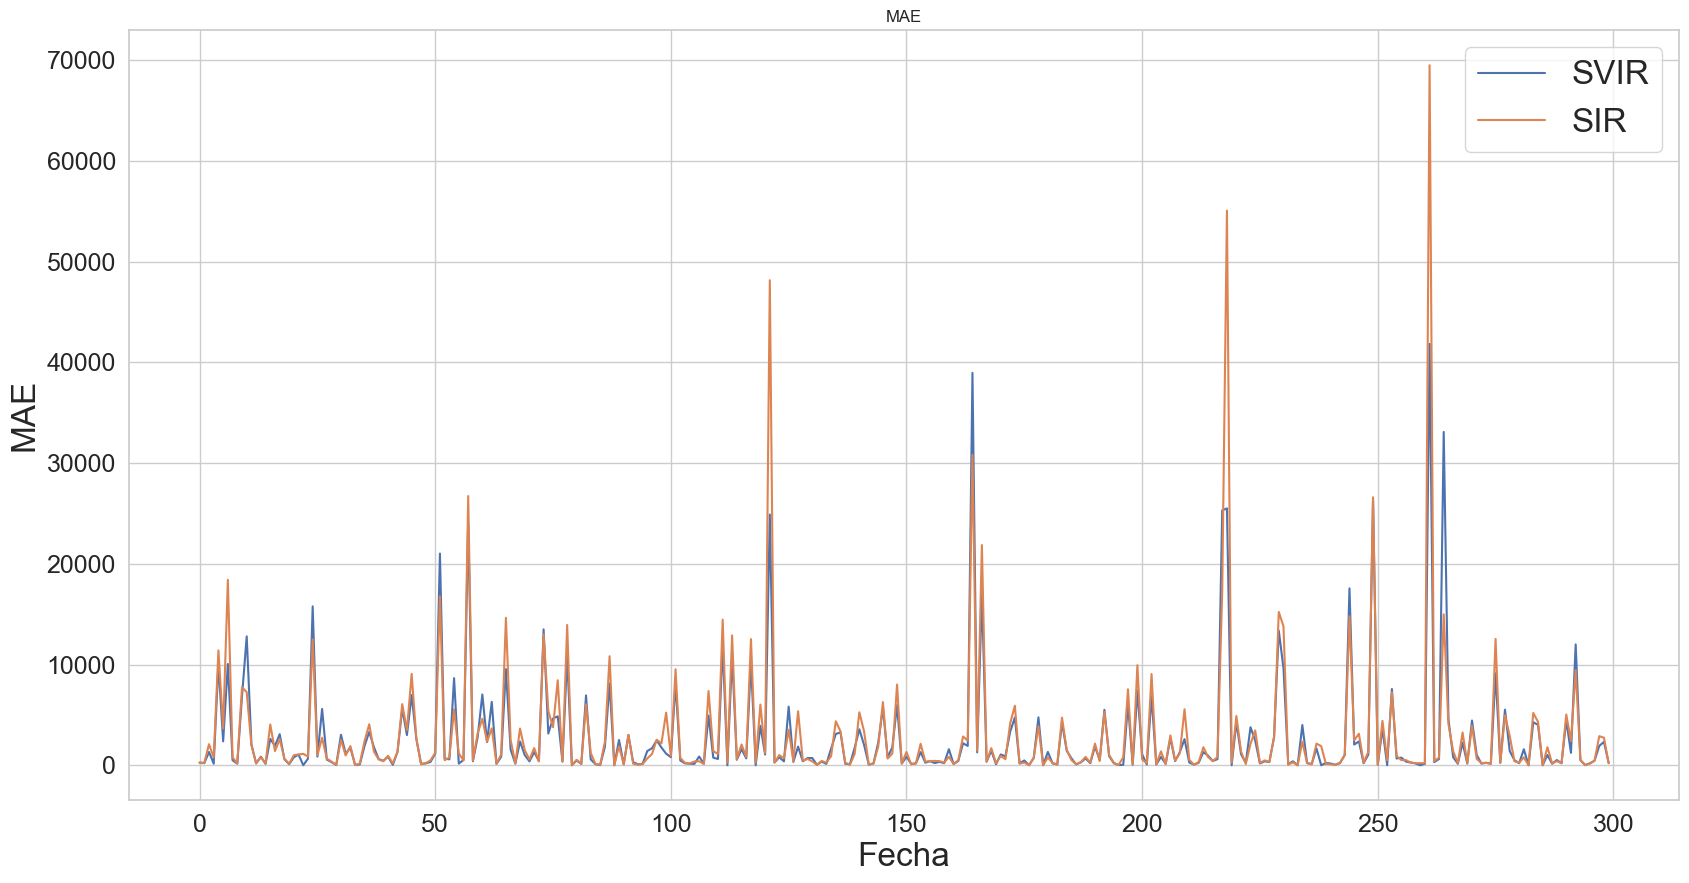

In [60]:
from datetime import datetime
# Vamos a leer todos los txts del directorio maes y almacenamos el mae del modelo svir
maes_svir_none_casos = [] 
maes_sir_none_casos = []
for file in os.listdir('datos_SVIR/resultados_none_casos/maes/'):
    with open('datos_SVIR/resultados_none_casos/maes/' + file, 'r') as f:
        print("Reading file: ", file)
        print("=====================================================")
        print(file.split('_'))
        lines = f.readlines()
        # Comprobamos que el fichero cuyo nombre esta formado por pais_fecha_inicio_fecha_fin
        # sea menor que junio, ya que los datos de junio no los tenemos
        fecha_inicio = file.split('_')[1]
        fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
        fecha_fin = file.split('_')[2].split('.')[0]
        print(fecha_fin)
        fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')
        if fecha_inicio.month < 6 and fecha_fin.month < 6:
            maes_svir_none_casos.append(float(lines[0].split(' ')[2]))
            maes_sir_none_casos.append(float(lines[3].split(' ')[2]))        
        f.close()
print("Mae SVIR None casos: ",np.mean(maes_svir_none_casos))
print("Mae SIR None casos: ",np.mean(maes_sir_none_casos))
plt.figure(figsize=(20,10))
plt.title('MAE')
plt.plot(maes_svir_none_casos, label='SVIR')
plt.plot(maes_sir_none_casos, label='SIR')

plt.xlabel('Fecha', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('MAE', fontsize=24)
plt.legend()
# Make the legend bigger
plt.legend(fontsize=24)
plt.show()


Reading file:  Latvia_2021-01-11_2021-01-25.txt
['Latvia', '2021-01-11', '2021-01-25.txt']
2021-01-25
Reading file:  Portugal_2021-05-17_2021-05-31.txt
['Portugal', '2021-05-17', '2021-05-31.txt']
2021-05-31
Reading file:  Latvia_2021-07-26_2021-08-09.txt
['Latvia', '2021-07-26', '2021-08-09.txt']
2021-08-09
Reading file:  Portugal_2021-07-12_2021-07-26.txt
['Portugal', '2021-07-12', '2021-07-26.txt']
2021-07-26
Reading file:  Slovak Republic_2021-02-08_2021-02-22.txt
['Slovak Republic', '2021-02-08', '2021-02-22.txt']
2021-02-22
Reading file:  Portugal_2021-11-15_2021-11-29.txt
['Portugal', '2021-11-15', '2021-11-29.txt']
2021-11-29
Reading file:  Norway_2021-04-05_2021-04-19.txt
['Norway', '2021-04-05', '2021-04-19.txt']
2021-04-19
Reading file:  Germany_2021-04-19_2021-05-03.txt
['Germany', '2021-04-19', '2021-05-03.txt']
2021-05-03
Reading file:  Luxembourg_2021-05-31_2021-06-14.txt
['Luxembourg', '2021-05-31', '2021-06-14.txt']
2021-06-14
Reading file:  Latvia_2021-11-29_2021-12-1

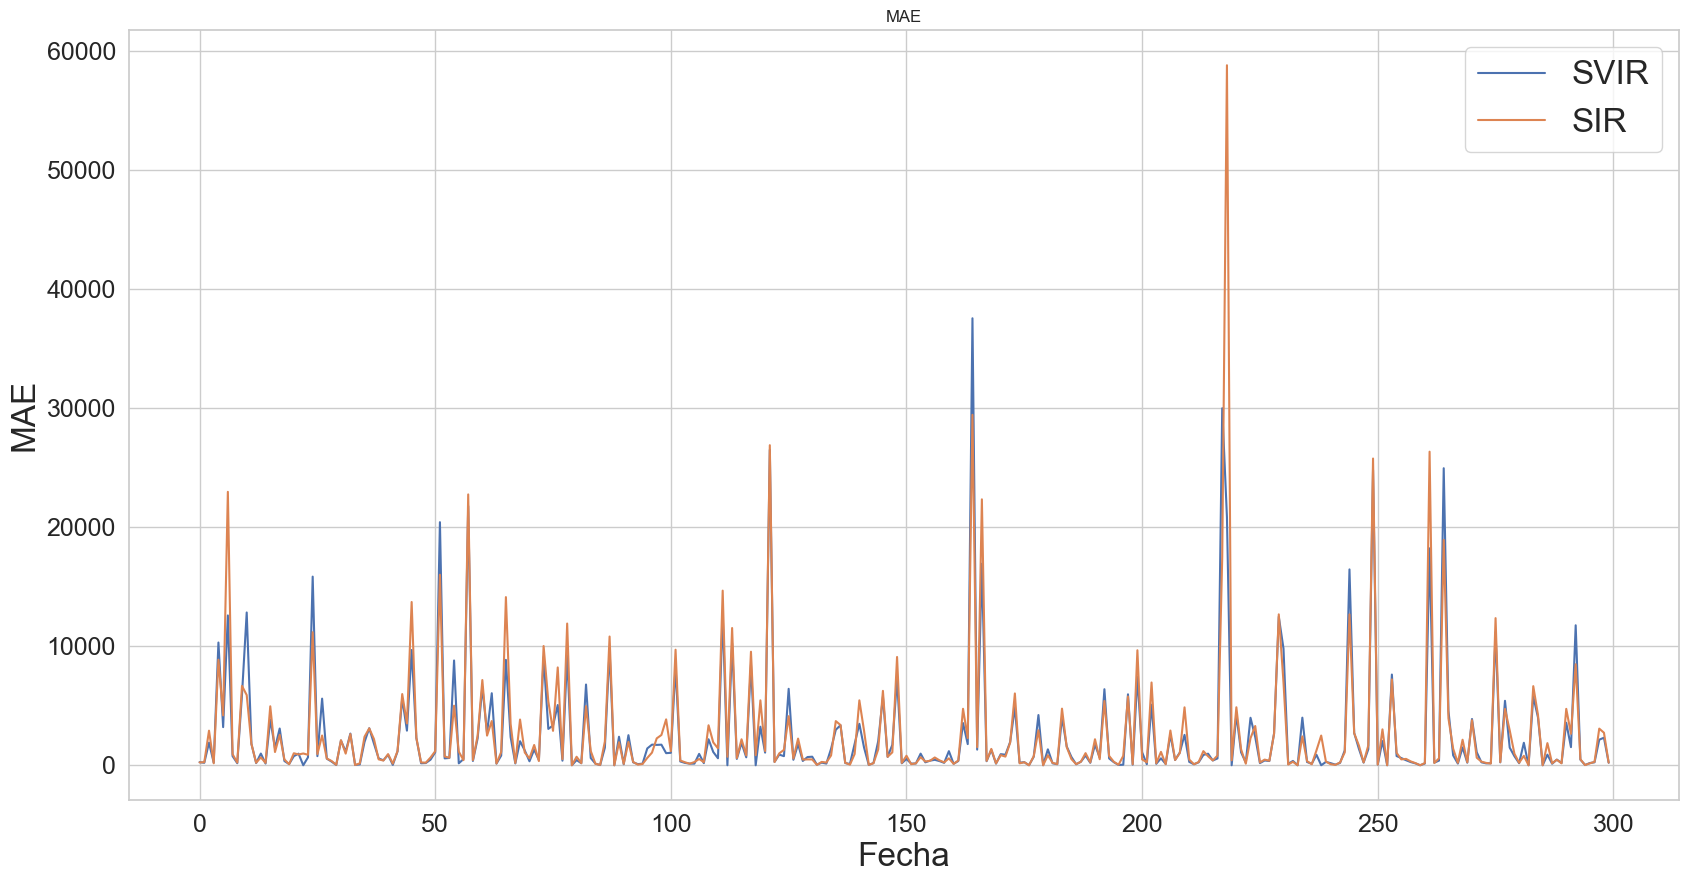

In [61]:
from datetime import datetime
# Vamos a leer todos los txts del directorio maes y almacenamos el mae del modelo svir
maes_svir_none_waning = [] 
maes_sir_none_waning = []
for file in os.listdir('datos_SVIR/resultados_none_waning/maes/'):
    with open('datos_SVIR/resultados_none_waning/maes/' + file, 'r') as f:
        print("Reading file: ", file)
        print("=====================================================")
        print(file.split('_'))
        lines = f.readlines()
        # Comprobamos que el fichero cuyo nombre esta formado por pais_fecha_inicio_fecha_fin
        # sea menor que junio, ya que los datos de junio no los tenemos
        fecha_inicio = file.split('_')[1]
        fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
        fecha_fin = file.split('_')[2].split('.')[0]
        print(fecha_fin)
        fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')
        if fecha_inicio.month < 6 and fecha_fin.month < 6:
            maes_svir_none_waning.append(float(lines[0].split(' ')[2]))
            maes_sir_none_waning.append(float(lines[3].split(' ')[2]))        
        f.close()
print(np.mean(maes_svir_none_waning))
print("Mae SVIR None waning: ",np.mean(maes_svir_none_waning))
print("Mae SIR None waning: ",np.mean(maes_sir_none_waning))
print(np.mean(maes_sir_none_waning))
plt.figure(figsize=(20,10))
plt.title('MAE')
plt.plot(maes_svir_none_waning, label='SVIR')
plt.plot(maes_sir_none_waning, label='SIR')

plt.xlabel('Fecha', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('MAE', fontsize=24)
plt.legend()
# Make the legend bigger
plt.legend(fontsize=24)
plt.show()


Reading file:  Latvia_2021-01-11_2021-01-25.txt
['Latvia', '2021-01-11', '2021-01-25.txt']
2021-01-25
Reading file:  Portugal_2021-05-17_2021-05-31.txt
['Portugal', '2021-05-17', '2021-05-31.txt']
2021-05-31
Reading file:  Latvia_2021-07-26_2021-08-09.txt
['Latvia', '2021-07-26', '2021-08-09.txt']
2021-08-09
Reading file:  Portugal_2021-07-12_2021-07-26.txt
['Portugal', '2021-07-12', '2021-07-26.txt']
2021-07-26
Reading file:  Slovak Republic_2021-02-08_2021-02-22.txt
['Slovak Republic', '2021-02-08', '2021-02-22.txt']
2021-02-22
Reading file:  Portugal_2021-11-15_2021-11-29.txt
['Portugal', '2021-11-15', '2021-11-29.txt']
2021-11-29
Reading file:  Norway_2021-04-05_2021-04-19.txt
['Norway', '2021-04-05', '2021-04-19.txt']
2021-04-19
Reading file:  Germany_2021-04-19_2021-05-03.txt
['Germany', '2021-04-19', '2021-05-03.txt']
2021-05-03
Reading file:  Luxembourg_2021-05-31_2021-06-14.txt
['Luxembourg', '2021-05-31', '2021-06-14.txt']
2021-06-14
Reading file:  Latvia_2021-11-29_2021-12-1

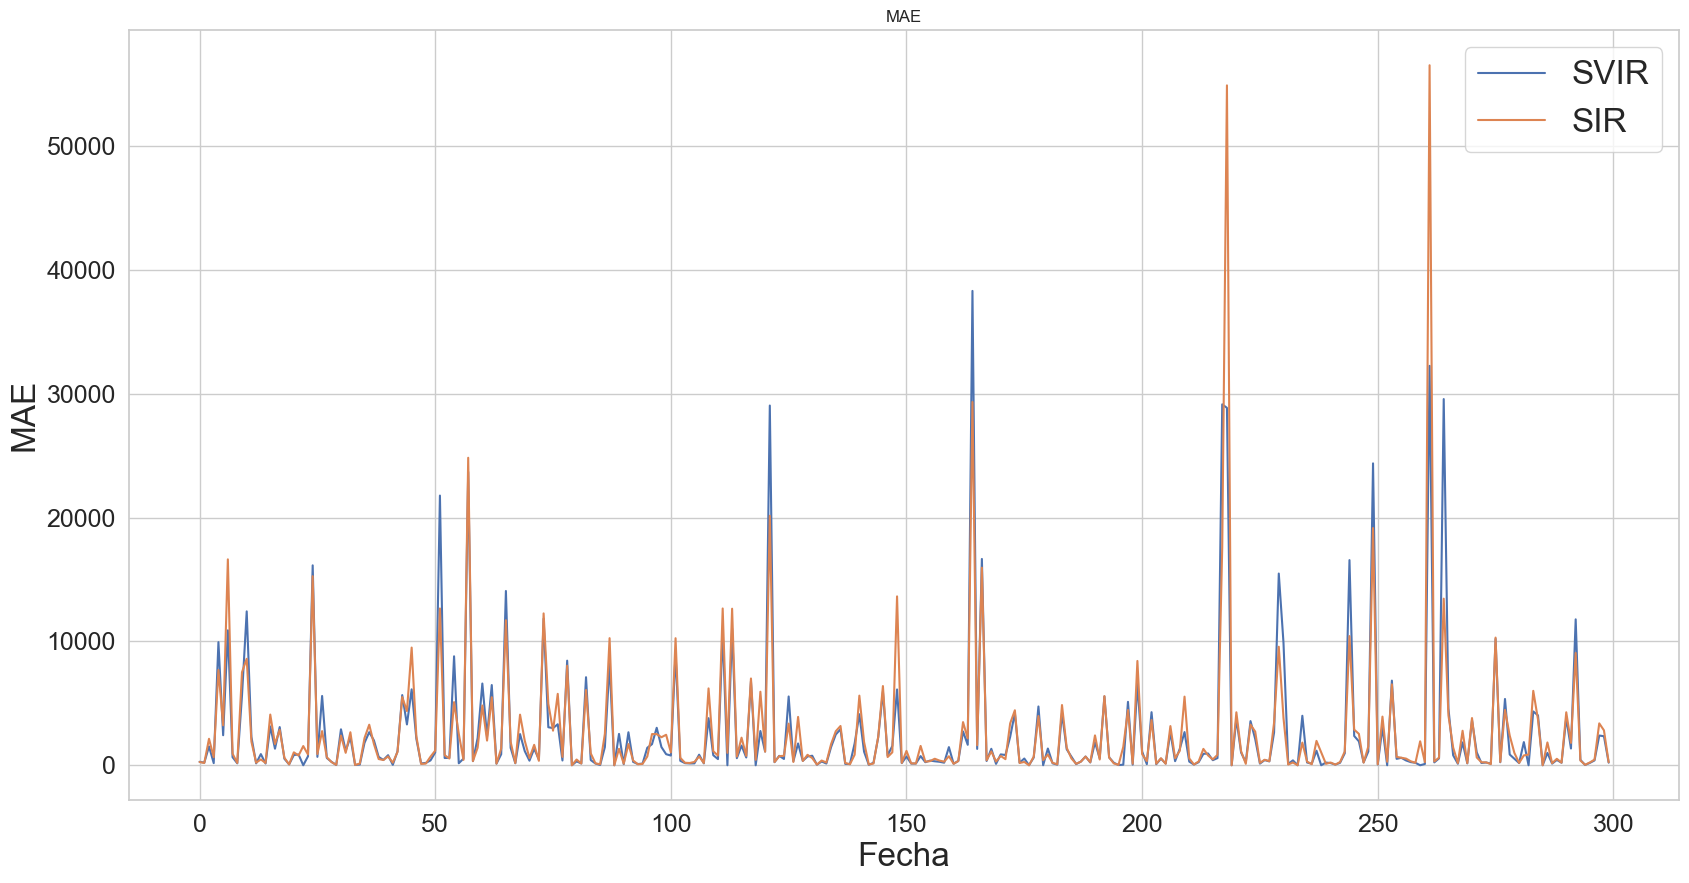

In [62]:
from datetime import datetime
# Vamos a leer todos los txts del directorio maes y almacenamos el mae del modelo svir
maes_svir_h7_casos = [] 
maes_sir_h7_casos = []
for file in os.listdir('datos_SVIR/resultados_h7_casos/maes/'):
    with open('datos_SVIR/resultados_h7_casos/maes/' + file, 'r') as f:
        print("Reading file: ", file)
        print("=====================================================")
        print(file.split('_'))
        lines = f.readlines()
        # Comprobamos que el fichero cuyo nombre esta formado por pais_fecha_inicio_fecha_fin
        # sea menor que junio, ya que los datos de junio no los tenemos
        fecha_inicio = file.split('_')[1]
        fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
        fecha_fin = file.split('_')[2].split('.')[0]
        print(fecha_fin)
        fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')
        if fecha_inicio.month < 6 and fecha_fin.month < 6:
            maes_svir_h7_casos.append(float(lines[0].split(' ')[2]))
            maes_sir_h7_casos.append(float(lines[3].split(' ')[2]))        
        f.close()
print(np.mean(maes_svir_h7_casos))
print(np.mean(maes_sir_h7_casos))
print("Mae SVIR H7 casos: ",np.mean(maes_svir_h7_casos))
print("Mae SIR H7 casos: ",np.mean(maes_sir_h7_casos))
plt.figure(figsize=(20,10))
plt.title('MAE')
plt.plot(maes_svir_h7_casos, label='SVIR')
plt.plot(maes_sir_h7_casos, label='SIR')

plt.xlabel('Fecha', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('MAE', fontsize=24)
plt.legend()
# Make the legend bigger
plt.legend(fontsize=24)
plt.show()


Reading file:  Latvia_2021-01-11_2021-01-25.txt
['Latvia', '2021-01-11', '2021-01-25.txt']
2021-01-25
Reading file:  Portugal_2021-05-17_2021-05-31.txt
['Portugal', '2021-05-17', '2021-05-31.txt']
2021-05-31
Reading file:  Latvia_2021-07-26_2021-08-09.txt
['Latvia', '2021-07-26', '2021-08-09.txt']
2021-08-09
Reading file:  Portugal_2021-07-12_2021-07-26.txt
['Portugal', '2021-07-12', '2021-07-26.txt']
2021-07-26
Reading file:  Slovak Republic_2021-02-08_2021-02-22.txt
['Slovak Republic', '2021-02-08', '2021-02-22.txt']
2021-02-22
Reading file:  Portugal_2021-11-15_2021-11-29.txt
['Portugal', '2021-11-15', '2021-11-29.txt']
2021-11-29
Reading file:  Norway_2021-04-05_2021-04-19.txt
['Norway', '2021-04-05', '2021-04-19.txt']
2021-04-19
Reading file:  Germany_2021-04-19_2021-05-03.txt
['Germany', '2021-04-19', '2021-05-03.txt']
2021-05-03
Reading file:  Luxembourg_2021-05-31_2021-06-14.txt
['Luxembourg', '2021-05-31', '2021-06-14.txt']
2021-06-14
Reading file:  Latvia_2021-11-29_2021-12-1

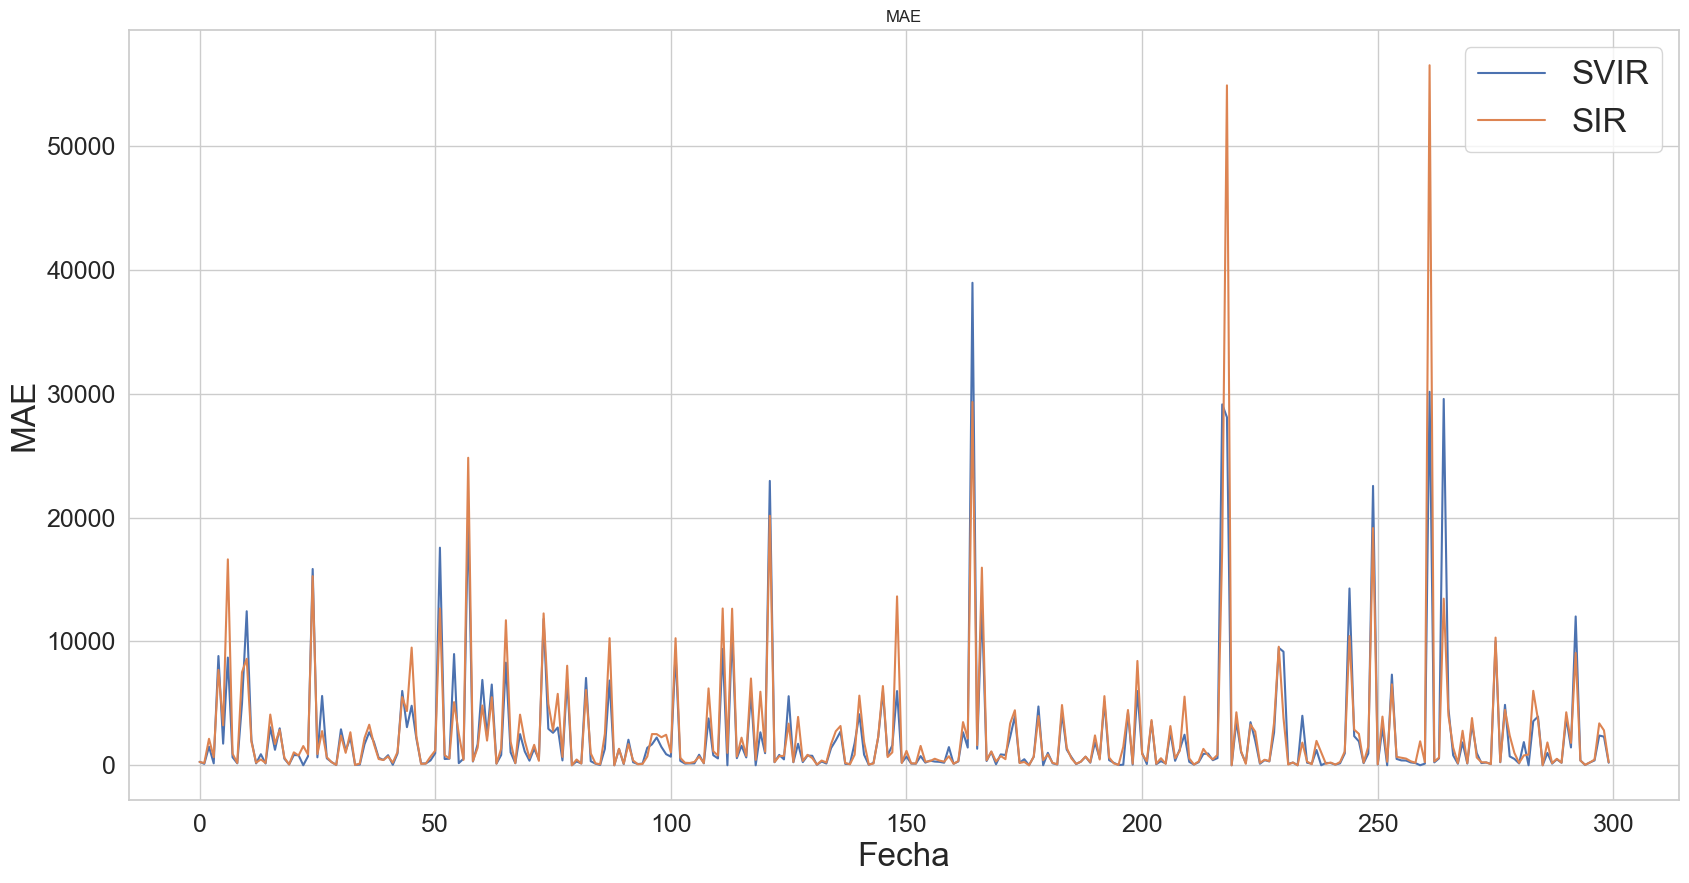

In [63]:
from datetime import datetime
# Vamos a leer todos los txts del directorio maes y almacenamos el mae del modelo svir
maes_svir_h7_waning = [] 
maes_sir_h7_waning = []
for file in os.listdir('datos_SVIR/resultados_h7_waning/maes/'):
    with open('datos_SVIR/resultados_h7_waning/maes/' + file, 'r') as f:
        print("Reading file: ", file)
        print("=====================================================")
        print(file.split('_'))
        lines = f.readlines()
        # Comprobamos que el fichero cuyo nombre esta formado por pais_fecha_inicio_fecha_fin
        # sea menor que junio, ya que los datos de junio no los tenemos
        fecha_inicio = file.split('_')[1]
        fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
        fecha_fin = file.split('_')[2].split('.')[0]
        print(fecha_fin)
        fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')
        if fecha_inicio.month < 6 and fecha_fin.month < 6:
            maes_svir_h7_waning.append(float(lines[0].split(' ')[2]))
            maes_sir_h7_waning.append(float(lines[3].split(' ')[2]))        
        f.close()
print(np.mean(maes_svir_h7_waning))
print(np.mean(maes_sir_h7_waning))
print("Mae SVIR H7 waning: ",np.mean(maes_svir_h7_waning))
print("Mae SIR H7 waning: ",np.mean(maes_sir_h7_waning))
plt.figure(figsize=(20,10))
plt.title('MAE')
plt.plot(maes_svir_h7_waning, label='SVIR')
plt.plot(maes_sir_h7_waning, label='SIR')

plt.xlabel('Fecha', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('MAE', fontsize=24)
plt.legend()
# Make the legend bigger
plt.legend(fontsize=24)
plt.show()


In [64]:
# Vamos a sacar el mean rank de todos los modelos
ganadores = []
for i in range(len(maes_svir_none_casos)):
    maes_svir_none_casos[i] = float(maes_svir_none_casos[i])
    maes_sir_none_casos[i] = float(maes_sir_none_casos[i])
    maes_svir_none_waning[i] = float(maes_svir_none_waning[i])
    maes_sir_none_waning[i] = float(maes_sir_none_waning[i])
    
    maes_svir_h7_casos[i] = float(maes_svir_h7_casos[i])
    maes_sir_h7_casos[i] = float(maes_sir_h7_casos[i])
    maes_svir_h7_waning[i] = float(maes_svir_h7_waning[i])
    maes_sir_h7_waning[i] = float(maes_sir_h7_waning[i])
    maes_xprice[i] = float(maes_xprice[i])
    
    todos = [maes_svir_none_casos[i],  # 0
             maes_sir_none_casos[i],   # 1
             maes_svir_none_waning[i], # 2
             maes_sir_none_waning[i],  # 3
             maes_svir_h7_casos[i],    # 4 
             maes_sir_h7_casos[i],     # 5
             maes_svir_h7_waning[i],   # 6
             maes_sir_h7_waning[i],    # 7
                maes_xprice[i]]           # 8
    # Guardamos las posiciones de mayor a menor
    posiciones = np.argsort(todos)
    # El ganador es el que esta en la primera posicion
    ganadores.append(posiciones)
    

IndexError: list index out of range

In [ ]:
ganadores

[array([8, 6, 0, 4, 2, 5, 3, 7, 1]),
 array([2, 6, 7, 0, 3, 4, 1, 8, 5]),
 array([2, 6, 0, 4, 7, 3, 1, 5, 8]),
 array([8, 5, 4, 0, 2, 6, 7, 3, 1]),
 array([3, 5, 1, 8, 7, 6, 0, 4, 2]),
 array([0, 2, 4, 6, 7, 5, 8, 3, 1]),
 array([0, 4, 6, 2, 7, 3, 1, 5, 8]),
 array([2, 6, 5, 4, 0, 7, 1, 8, 3]),
 array([4, 0, 6, 7, 2, 5, 3, 1, 8]),
 array([4, 0, 5, 2, 6, 7, 1, 3, 8]),
 array([4, 6, 3, 2, 0, 8, 7, 5, 1]),
 array([2, 6, 4, 0, 7, 5, 1, 3, 8]),
 array([6, 0, 7, 4, 2, 3, 5, 1, 8]),
 array([8, 0, 6, 2, 4, 3, 7, 1, 5]),
 array([1, 8, 6, 2, 0, 4, 3, 5, 7]),
 array([5, 2, 4, 6, 3, 0, 1, 7, 8]),
 array([0, 4, 6, 2, 7, 5, 3, 1, 8]),
 array([3, 2, 5, 4, 6, 0, 1, 8, 7]),
 array([3, 7, 5, 0, 1, 4, 6, 2, 8]),
 array([2, 7, 6, 0, 4, 3, 5, 1, 8]),
 array([3, 7, 5, 1, 2, 6, 0, 4, 8]),
 array([7, 2, 6, 3, 4, 0, 1, 5, 8]),
 array([4, 2, 0, 6, 3, 7, 1, 5, 8]),
 array([8, 7, 1, 0, 4, 3, 2, 6, 5]),
 array([6, 4, 7, 2, 0, 1, 5, 3, 8]),
 array([1, 5, 3, 7, 4, 0, 6, 2, 8]),
 array([4, 0, 6, 2, 7, 5, 3, 1, 8]),
 

In [ ]:
# Sacamos el mean rank de cada modelo
mean_rank_svir_none_casos = []
mean_rank_sir_none_casos = []
mean_rank_svir_none_waning = []
mean_rank_sir_none_waning = []
mean_rank_svir_h7_casos = []
mean_rank_sir_h7_casos = []
mean_rank_svir_h7_waning = []
mean_rank_sir_h7_waning = []
mean_rank_xprice = []
for i in range(len(ganadores)):
    mean_rank_svir_none_casos.append(ganadores[i].tolist().index(0))
    mean_rank_sir_none_casos.append(ganadores[i].tolist().index(1))
    mean_rank_svir_none_waning.append(ganadores[i].tolist().index(2))
    mean_rank_sir_none_waning.append(ganadores[i].tolist().index(3))
    mean_rank_svir_h7_casos.append(ganadores[i].tolist().index(4))
    mean_rank_sir_h7_casos.append(ganadores[i].tolist().index(5))
    mean_rank_svir_h7_waning.append(ganadores[i].tolist().index(6))
    mean_rank_sir_h7_waning.append(ganadores[i].tolist().index(7))
    mean_rank_xprice.append(ganadores[i].tolist().index(8))
print("Mean rank SVIR none casos: ", np.mean(mean_rank_svir_none_casos))
print("Mean rank SIR none casos: ", np.mean(mean_rank_sir_none_casos))
print("Mean rank SVIR none waning: ", np.mean(mean_rank_svir_none_waning))
print("Mean rank SIR none waning: ", np.mean(mean_rank_sir_none_waning))
print("Mean rank SVIR h7 casos: ", np.mean(mean_rank_svir_h7_casos)) 
print("Mean rank SIR h7 casos: ", np.mean(mean_rank_sir_h7_casos))
print("Mean rank SVIR h7 waning: ", np.mean(mean_rank_svir_h7_waning)) 
print("Mean rank SIR h7 waning: ", np.mean(mean_rank_sir_h7_waning))
print("Mean rank XPRICE: ", np.mean(mean_rank_xprice))

Mean rank SVIR none casos:  2.9916666666666667
Mean rank SIR none casos:  5.1625
Mean rank SVIR none waning:  2.3958333333333335
Mean rank SIR none waning:  4.129166666666666
Mean rank SVIR h7 casos:  2.8666666666666667
Mean rank SIR h7 casos:  3.8958333333333335
Mean rank SVIR h7 waning:  2.591666666666667
Mean rank SIR h7 waning:  3.966666666666667
